# Chapter 7 - Moving Beyond Linearity

In [4]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.interpolate import CubicSpline, LSQUnivariateSpline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.discrete.discrete_model import Logit
%matplotlib inline

BASE_DIR = 'https://gitlab.com/machine-learning-course1/ml-practice-lg-2024-spring/-/raw/main'

### Load Datasets

In [5]:
wage = pd.read_csv(f'{BASE_DIR}/Data/Wage.csv')
wage = wage.drop(columns=['Unnamed: 0'])
wage.head(3)

year  age      sex            maritl      race        education  \
0  2006   18  1. Male  1. Never Married  1. White     1. < HS Grad   
1  2004   24  1. Male  1. Never Married  1. White  4. College Grad   
2  2003   45  1. Male        2. Married  1. White  3. Some College   

               region        jobclass          health health_ins   logwage  \
0  2. Middle Atlantic   1. Industrial       1. <=Good      2. No  4.318063   
1  2. Middle Atlantic  2. Information  2. >=Very Good      2. No  4.255273   
2  2. Middle Atlantic   1. Industrial       1. <=Good     1. Yes  4.875061   

         wage  
0   75.043154  
1   70.476020  
2  130.982177

## 1. Polynomial Regression

### 1.1. Polynomial Regression Plot


#### Plotting polynomial regression curve by training the model by yourself

In [6]:
X = wage[['age']].values
Y = wage['wage'].values

# Creating a pipeline for polynomial regression (pipeline: stream of routine processing)
regr = make_pipeline(
    PolynomialFeatures(4),
    LinearRegression(),
)
regr.fit(X, Y)

# Generating a range of X values for prediction
X_grid = np.arange(np.min(X), np.max(X)).reshape(-1, 1)

Y_grid = regr.predict(X_grid)

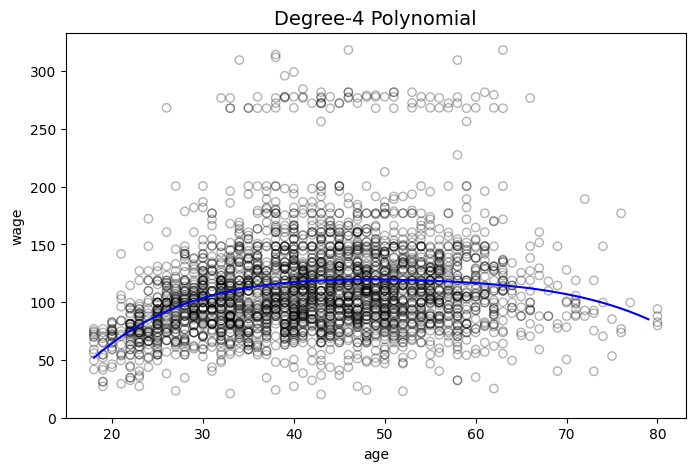

In [7]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.scatter(X, Y, facecolor='None', edgecolor='k', alpha=0.3)
ax.plot(X_grid, Y_grid, color='b')

ax.set_title('Degree-4 Polynomial', fontsize=14)
ax.set_xlabel('age')
ax.set_ylabel('wage')
ax.set_ylim(ymin=0)
plt.show()

#### 1.2. Probability Estimation with Logistic Regression

In [8]:
# Assign binaries on whether the wage is larger than 250 or not to y.
wage_prob = (wage['wage'] > 250).values.astype(int)
X = wage[['age']].values
Y = wage_prob

X_grid = np.arange(np.min(X), np.max(X), 0.1).reshape(-1, 1)

# Train the logistic regression with 4 polynomials
X_poly = PolynomialFeatures(4).fit_transform(X) # for training
X_poly_grid = PolynomialFeatures(4).fit_transform(X_grid) # for prediction

regr = Logit(Y, X_poly).fit(disp=0)
Y_grid = regr.predict(X_poly_grid)

# Plot
fig, ax = plt.subplots(figsize=(8, 5))

# True on the top, False on the bottom.
ax.scatter(X, Y / 5, c='grey', marker='|', alpha=0.7)
ax.plot(X_grid, Y_grid, color='b');

ax.set_xlabel('age')
ax.set_ylabel('Pr(wage > 250 | age)')
plt.show()

### 1.3. Exercise: Plot data and the polynomial regression curves with multiple degress as the below image. [5 min]

<img src="https://gitlab.com/machine-learning-course1/ml-practice-lg-2024-spring/-/raw/main/Images/7-2.png">

In [9]:
def PolynomialRegression(degree=None):
    return make_pipeline(
        PolynomialFeatures(degree),
        LinearRegression(),
    )

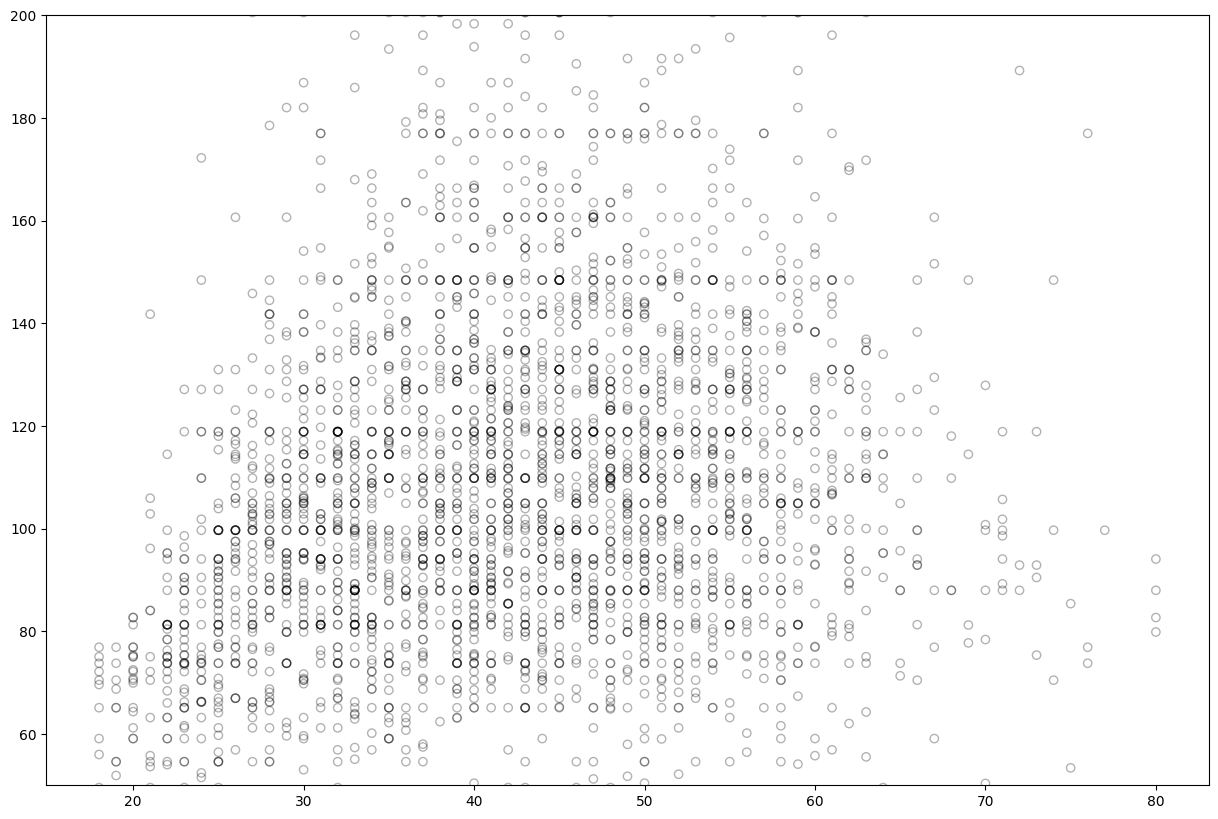

In [10]:
X = wage[['age']].values
Y = wage[['wage']].values

fig, ax = plt.subplots(figsize=(15, 10))
ax.set_ylim(50, 200)

# TODO: Draw data with the following parameters: {label: 'data', facecolor: 'none', edgecolor: 'k', alpha: 0.3}
ax.scatter(X, Y, facecolor='None', edgecolor='k', alpha=0.3)

for degree in [1, 2, 3, 4, 10, 20]:
    # TODO: Create a model instance.

    # TODO: Train the model.

    # TODO: Create a grid. range: min(X) ~ max(X), interval: 0.1

    # TODO: Run the model to predict values.

    # TODO: Plot the predicted values.

ax.legend()
plt.show()

### 1.4. Finding the best degree for polynomial regression

Generating a random data with the polynomial degree 5

In [11]:
np.random.seed(1)
X = np.linspace(-4, 7, 1000)
Y = 20 * X - 5 * X ** 2 - 1 * X ** 3 + 0.2 * X ** 4 + np.random.normal(-3, 15, X.shape[0])

X = X.reshape(-1, 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=5)

figure, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 5))
ax0.scatter(X_train, Y_train, s=10)
ax1.scatter(X_test, Y_test, s=10)
plt.show()

#### 1.5. Exercise: Draw the data and the  regression curves of the image below (10 min)
<img src="https://gitlab.com/machine-learning-course1/ml-practice-lg-2024-spring/-/raw/main/Images/7-3.png">

Use `X_train` and `Y_train` for the regression.

In [12]:
fig, ax = plt.subplots(figsize=(15, 10))

X_grid = np.arange(np.min(X_train), np.max(X_train), 0.1).reshape(-1, 1)
for degree in [1, 2, 3, 4, 10, 20]:
    # TODO


ax.scatter(X_train, Y_train, label='data', facecolor='none', edgecolor='k', alpha=0.3)

ax.legend()
plt.show()

#### 1.6. Finding the best loss. Let's draw the below graph (Step 1 ~ Step 3) [10min]

<img src="https://gitlab.com/machine-learning-course1/ml-practice-lg-2024-spring/-/raw/main/Images/7-4.png">

#### 1.6.1. Step 1: Run grid search.

* Use ```GridSearchCV``` with ```PolynomialRegression```.
* Pass ```{'Polynomial Features__degree': degrees}``` to ```GridSearchCV``` as a parameter.
* Use ```'neg_mean_squared_error'``` for the scoring method.
* You also need to pass ```True``` as a ```return_train_score``` parameter.

#### 1.6.2. Step 2: Get train errors, cross validation errors, and test errors.
* Get ```mean_train_score``` and ```mean_test_scores``` from the grid search results and save them to ```train_errors``` and ```cv_errors``` each.
* For each degree, train ```PolynomialRegression``` model and get the test error with ```mean_squared_error``` function.

Expected results:
```
train errors:
 [404.20148672 211.42155277 211.30929552 210.31065383 210.18580973
 209.80031717 209.64626533 209.56266022 209.49534568 209.45829024
 208.48010635 208.41604738 208.17294383]
cross validation errors:
 [410.39117682 214.41878765 214.73994789 214.16564731 214.80338374
 214.72089807 215.21375817 215.71341747 216.88527307 217.48325122
 217.50923652 218.42281158 218.9727831 ]
test errors:
 [385.2064310638468, 231.24248723324033, 231.7272636199667, 232.57026792254462, 232.90170248940277, 233.74996174281037, 233.4874828611583, 233.82967121769713, 233.90236026028845, 233.87975536631518, 238.3408693235651, 237.899757747921, 239.05531338897976]
```

#### 1.6.3. Step 3: Draw the graph above.

#### 1.6.4. Print the best parameter

In [13]:
print(f'Best Parameter (cross-validation): {regr.best_params_}')

AttributeError: 'Pipeline' object has no attribute 'best_params_'